In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sampler 

In [3]:
sler = sampler.Sampler('isbi/train-input.tif', 'isbi/train-labels.tif')

[[ -5.02896916e+00  -5.04002530e+00  -5.04849573e+00 ...,   5.95855926e+00
    5.86213919e+00   5.76590127e+00]
 [ -5.09873273e+00  -5.10967491e+00  -5.11799137e+00 ...,   6.03998071e+00
    5.94224677e+00   5.84470097e+00]
 [ -5.16801141e+00  -5.17883100e+00  -5.18698504e+00 ...,   6.12116377e+00
    6.02212505e+00   5.92328039e+00]
 ..., 
 [  3.60050333e+00   3.69232451e+00   3.78479372e+00 ...,   7.16928289e-02
    9.92232859e-02   1.25796441e-01]
 [  3.57593801e+00   3.66712273e+00   3.75895589e+00 ...,   3.83382591e-02
    6.62401545e-02   9.31937530e-02]
 [  3.54953940e+00   3.64004065e+00   3.73119017e+00 ...,   6.06534392e-03
    3.43002530e-02   6.15964350e-02]]


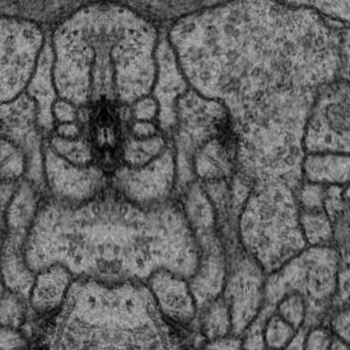

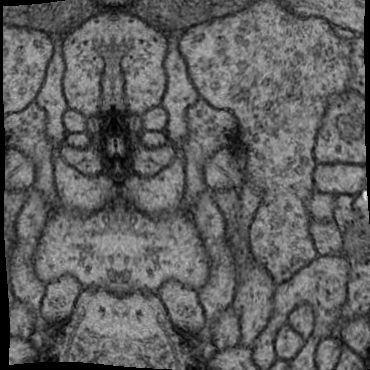

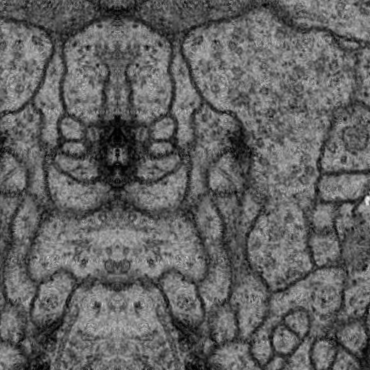

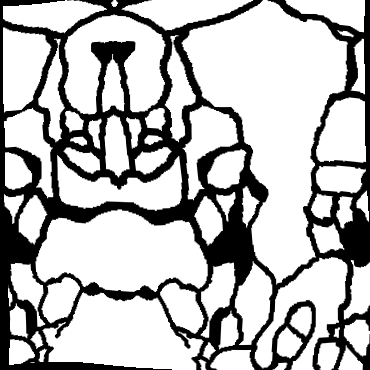

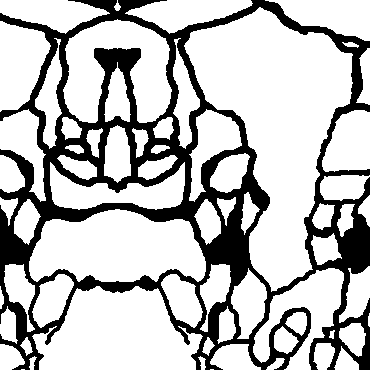

In [31]:
outline, im, lab, orig_im, orig_lab, cropped = sler.get_image(350, 2, 1)
showarray(np.squeeze(cropped))
showarray(np.squeeze(im))
showarray(np.squeeze(orig_im))
showarray(np.squeeze(lab))
showarray(np.squeeze(orig_lab))


In [78]:
lab-orig_lab

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ..., 
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ..., 
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ..., 
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       ..., 
       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [1, 1, 1, 

In [5]:
import tensorflow as tf
import os
import numpy as np
import tifffile as tif

In [6]:
import PIL.Image
from cStringIO import StringIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [7]:
input_file = 'isbi/train-input.tif'
labels_file = 'isbi/train-labels.tif'
inp = tif.imread(input_file)
out = tif.imread(labels_file)

dset = np.stack((inp, out), axis=3)

In [5]:
dset.shape

(27, 512, 512, 2)

In [54]:
FOV = 256

dataset = tf.constant(dset)
padded_dataset = tf.pad(dataset, [[0,0], [FOV//2, FOV//2], [FOV//2, FOV//2], [0,0]], mode='REFLECT')
sample = tf.random_crop(padded_dataset, size=[1, FOV, FOV, 2])
squeezed_sample = tf.squeeze(sample)

# Perform positional transformations on the image and the label together

# Rotate
distorted_sample = tf.image.random_flip_left_right(squeezed_sample)
distorted_sample = tf.image.random_flip_up_down(distorted_sample)

# Warp

# Separate the labels from the image
distorted_labels = distorted_sample[:,:,1:]
distorted_image = distorted_sample[:,:,0:1]

# Distort the image levels
distorted_image = tf.image.random_brightness(distorted_image, max_delta=0.15)
distorted_image = tf.image.random_contrast(distorted_image, lower=0.5, upper=1.5)

# Whitening
standardized_image = tf.image.per_image_standardization(distorted_image)

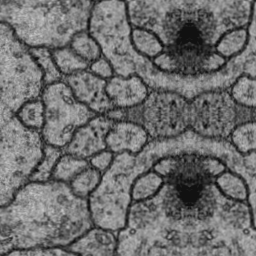

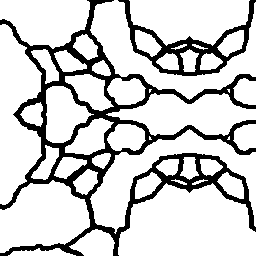

In [55]:
with tf.Session() as sess:
    image, labels = sess.run([distorted_image, distorted_labels])
    showarray(np.squeeze(image))
    showarray(np.squeeze(labels))

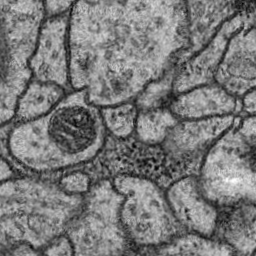